In [18]:
import Pkg
Pkg.activate("../../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [19]:
using Revise
using Turing
using LinearAlgebra
using Distributions
using Random
using StatsPlots
using PDMats
using StatsBase
using Base.Iterators
using DataFrames, TimeSeries, XLSX
using PrettyTables

In [20]:
include("../VARs/utils.jl")
includet("../RS/hmm_est.jl")

In [168]:
df = DataFrame(XLSX.readtable("../../data/usa_data.xlsx", "Data", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :Date), Dates.month, last)

freq = 12

macro_data = percentchange(data_source[:CPI, :INDPRO], :log)
macro_data = moving(mean, macro_data, 12) .* 12

returns = percentchange(data_source[:Total_Stock, :Price_10Y], :log)
cpi = percentchange(data_source[:CPI], :log)
real_returns = returns .- cpi
real_returns = from(real_returns, Date(1952,12,01))

start = Date(1955, 01,01)
end_d = Date(2024, 07, 28)



display("Macro data")
display(returns_summarystats(to(from(macro_data, start),end_d), freq))

display("Correlations")
display(cor(values(to(from(macro_data, start),end_d)))) 

"Macro data"

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
CPI,0.0915,1.6517,0.4225,0.5294,-0.2543,1.4492,0.2057,0.9883,2.3008,4.6151,0.3503
INDPRO,0.1777,2.3534,0.2986,0.6662,-2.2652,-0.7558,0.0241,0.9561,1.9846,1.6808,0.341


nothing

"Correlations"

2×2 Matrix{Float64}:
  1.0        -0.0912014
 -0.0912014   1.0

In [159]:
macro_data

860×2 TimeArray{Float64, 2, Date, Matrix{Float64}} 1952-12-01 to 2024-07-01
┌────────────┬────────────┬──────────────┐
│            │ CPI        │ INDPRO       │
├────────────┼────────────┼──────────────┤
│ 1952-12-01 │ 0.00376648 │     0.109904 │
│ 1953-01-01 │ 0.00757579 │     0.101784 │
│ 1953-02-01 │  0.0113423 │     0.101187 │
│ 1953-03-01 │ 0.00754721 │     0.106437 │
│ 1953-04-01 │  0.0112996 │      0.11985 │
│ 1953-05-01 │  0.0112572 │     0.134705 │
│ 1953-06-01 │ 0.00373832 │     0.140039 │
│ 1953-07-01 │ 0.00746272 │      0.16829 │
│     ⋮      │     ⋮      │      ⋮       │
│ 2024-01-01 │  0.0310448 │   -0.0123842 │
│ 2024-02-01 │  0.0341829 │ -0.000716208 │
│ 2024-03-01 │  0.0330224 │   -0.0028802 │
│ 2024-04-01 │  0.0321673 │   -0.0084376 │
│ 2024-05-01 │  0.0292811 │  -1.16527e-5 │
│ 2024-06-01 │   0.027544 │   0.00848599 │
│ 2024-07-01 │  0.0232707 │  -0.00537962 │
└────────────┴────────────┴──────────────┘
                          845 rows omitted

In [160]:
assets_names = [:CPI, :INDPRO]
n_assets = length(assets_names)

2

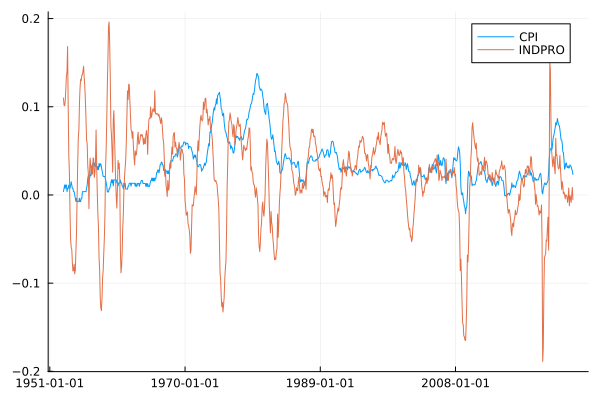

In [161]:
plot(macro_data)

In [162]:
n_regimes = 4
hmm = hmm_est(macro_data, n_regimes)
regime_summary(hmm[1], assets_names, 1)

Regime,CPI,INDPRO
1,0.026,0.027
2,0.028,-0.035
3,0.081,0.025
4,0.021,0.080


Regime,CPI,INDPRO
1,0.008,0.014
2,0.019,0.043
3,0.024,0.055
4,0.014,0.029


,CPI,INDPRO
CPI,1.000,0.264
INDPRO,0.264,1.000


,CPI,INDPRO
CPI,1.000,0.518
INDPRO,0.518,1.000


,CPI,INDPRO
CPI,1.000,-0.499
INDPRO,-0.499,1.000


,CPI,INDPRO
CPI,1.000,-0.278
INDPRO,-0.278,1.000


Regimes transition matrix


Regime,1,2,3,4
1,0.947,0.026,0.000,0.027
2,0.036,0.949,0.005,0.010
3,0.000,0.021,0.979,0.000
4,0.045,0.000,0.010,0.945


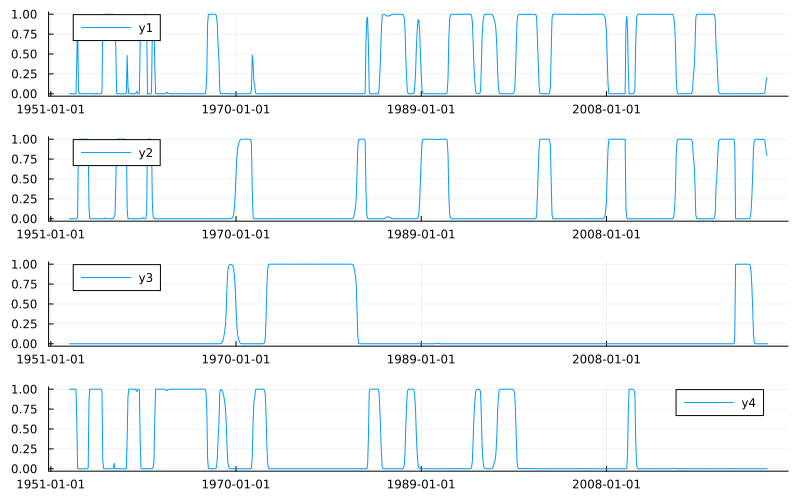

In [163]:
regimes_probs, likehood = forward_backward(hmm[1], collect(eachrow(values(macro_data))))

display(plot(timestamp(macro_data), eachrow(regimes_probs); layout=(4,1), size=(800,500)))

In [164]:
for regime in 1:4
    regime_mean = mean(values(real_returns), AnalyticWeights(regimes_probs[regime,:]), dims=1) .* 12
    display("regime: $regime")
    display("equity:  $(regime_mean[:,1])")
    display("bond:  $(regime_mean[:,2])")
end

"regime: 1"

"equity:  [0.09238380024948442]"

"bond:  [0.033075701848690325]"

"regime: 2"

"equity:  [0.11092849207534994]"

"bond:  [0.04676741153403147]"

"regime: 3"

"equity:  [-0.052602616019025064]"

"bond:  [-0.0637204415636775]"

"regime: 4"

"equity:  [0.0828700576053846]"

"bond:  [0.02417606759300424]"

In [165]:
for regime in 1:4
    regime_mean = std(values(real_returns), AnalyticWeights(regimes_probs[regime,:]), 1) .* 12^0.5
    display("regime: $regime")
    display("equity:  $(regime_mean[:,1])")
    display("bond:  $(regime_mean[:,2])")
end

"regime: 1"

"equity:  [0.12417621166041029]"

"bond:  [0.07303017457329196]"

"regime: 2"

"equity:  [0.1628501877743647]"

"bond:  [0.08562090100047183]"

"regime: 3"

"equity:  [0.16679348371880384]"

"bond:  [0.0927625968884175]"

"regime: 4"

"equity:  [0.14505830474614773]"

"bond:  [0.056352223722809895]"

In [166]:
mean(values(real_returns), AnalyticWeights(regimes_probs[4,:]), dims=1) .* 12

1×2 Matrix{Float64}:
 0.0828701  0.0241761

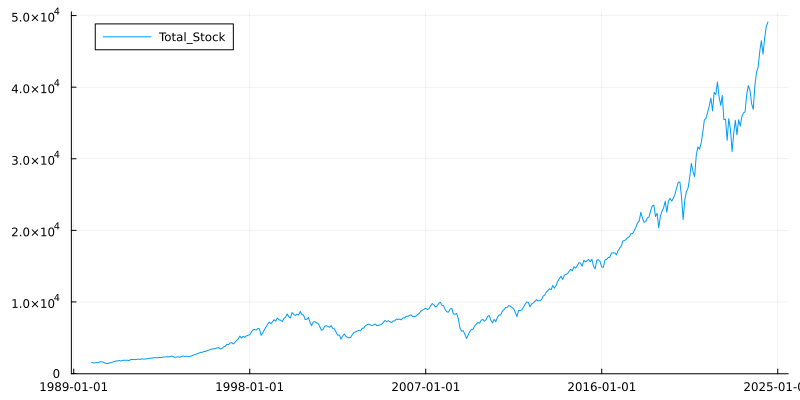

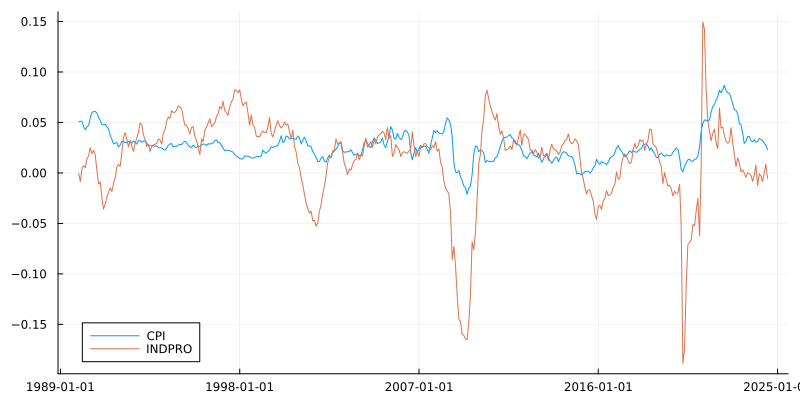

In [167]:
display(plot(from(data_source[:Total_Stock], Date(1989,12,01));size=(800, 400)))
display(plot(from(macro_data, Date(1989,12,01));size=(800, 400)))